# Economic VS EV sales

In [18]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.mlab as mlab
from mpmath import norm
import matplotlib
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm

In [2]:
path_EV = '../Processed_Data/Ev_sales.csv'
path_gdp = '../Processed_Data/gdp.csv'
path_income = '../Processed_Data/incomes.csv'

In [3]:
df_EV = pd.read_csv(path_EV).sort_values('State').set_index('State').drop(columns=['Unnamed: 0'])
df_gdp = pd.read_csv(path_gdp).sort_values('GeoName').set_index('GeoName').drop(columns=['Unnamed: 0'])
df_income = pd.read_csv(path_income).sort_values('GeoName').set_index('GeoName').drop(columns=['Unnamed: 0'])

In [4]:
df_income.head()

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,10467.9,10252.7,12141.1,13719.4,14571.1,14331.5,16687.0,17907.4,18931.3,20113.4,...,491754.4,790033.1,1185940.7,1629938.5,2175204.7,2680407.0,3251615.6,561796.4,4097666.7,10591485.7
Alaska,0.0,343.4,1834.8,2453.7,2598.4,2486.0,2633.0,2723.0,2688.8,2842.0,...,103757.3,172710.3,231480.8,299836.3,418046.7,593095.3,695672.9,95956.2,807784.7,2192509.1
Arizona,3738.2,3917.6,4731.7,5915.6,6359.8,6732.2,7652.7,8771.7,9488.8,10717.6,...,414098.9,784716.8,1197632.4,1967944.9,2999854.9,3653468.2,4894171.6,569427.7,4364393.0,13481460.5
Arkansas,6429.8,6002.5,6961.9,7638.7,7717.7,7672.4,8583.4,8753.5,9244.4,10108.6,...,280218.7,440516.1,644009.5,916271.4,1254655.3,1612672.7,2048814.3,321698.4,2281015.7,6264201.1
California,73098.0,76086.4,89729.5,104507.7,114912.5,120629.2,136485.1,150933.0,161009.6,179496.7,...,4474919.5,7767454.3,11280953.2,16209227.0,22363039.0,27437210.9,37870143.0,5844770.9,39732554.0,110884678.8


In [5]:
col = ['State','income','GDP','EV_sale']
data = pd.DataFrame(columns = col)
data['State']=df_income.index
data = data.set_index('State')
data['income']=df_income['2019']
data['GDP']=df_gdp['2019']
data['EV_sale']=df_EV['2019']
data.head()

,income,GDP,EV_sale
State,,,
Alabama,561796.4,126982.8,1007
Alaska,95956.2,29108.0,143
Arizona,569427.7,204327.8,7591
Arkansas,321698.4,73514.4,538
California,5844770.9,1615149.1,145020


In [6]:
highest_income = data.sort_values(by='income',ascending=False).index[0]
highest_gdp = data.sort_values(by='GDP',ascending=False).index[0]

lowest_income = data.sort_values(by='income',ascending=True).index[0]
lowest_gdp = data.sort_values(by='GDP',ascending=True).index[0]
highest_income, highest_gdp, lowest_income, lowest_gdp

('California', 'California', 'Wyoming', 'Wyoming')

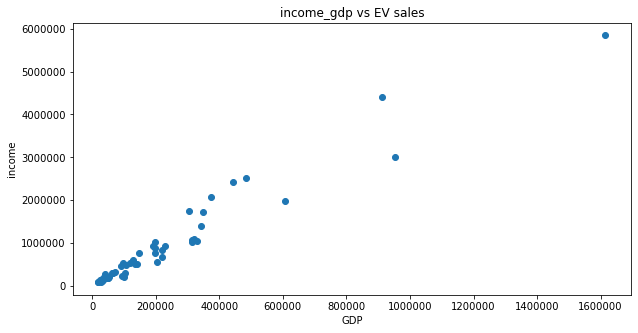

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(data['GDP'],data['income'])
plt.title("income_gdp vs EV sales")
plt.xlabel("GDP")
plt.ylabel("income")
plt.show()

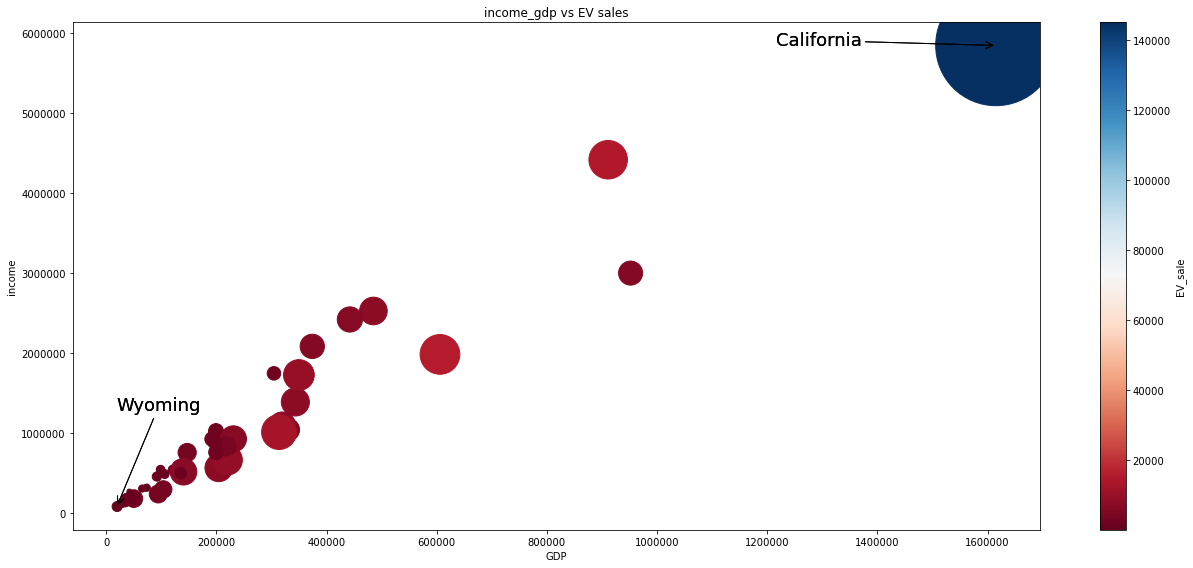

In [8]:
def draw(data, ax, size_scale=0.1, *args, **kwargs):
    data.plot.scatter(x='GDP',y='income',s=(data['EV_sale'])*size_scale, ax=ax,*args, **kwargs)
fig, ax = plt.subplots(figsize=(18,8))
ax.ticklabel_format(style='plain')
draw(data, ax, c='EV_sale', colormap='RdBu', colorbar=True)


plt.annotate(highest_income, xy = (data.loc[highest_income][['GDP', 'income']]), xytext = data.loc[highest_income][['GDP', 'income']] +(-400000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_gdp, xy = (data.loc[highest_gdp][['GDP', 'income']]), xytext = data.loc[highest_gdp][['GDP', 'income']] +(-400000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (data.loc[lowest_income][['GDP', 'income']]), xytext = data.loc[lowest_income][['GDP', 'income']] +(-0, +1200000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (data.loc[lowest_income][['GDP', 'income']]), xytext = data.loc[lowest_income][['GDP', 'income']] +(-0, +1200000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )


plt.title("income_gdp vs EV sales")
ax.set_xlabel('GDP')
ax.set_ylabel('income')
fig.tight_layout()

In [9]:
highest_income = data.drop("California").sort_values(by='income',ascending=False).index[0]
highest_gdp = data.drop("California").sort_values(by='GDP',ascending=False).index[0]

lowest_income = data.drop("California").sort_values(by='income',ascending=True).index[0]
lowest_gdp = data.drop("California").sort_values(by='GDP',ascending=True).index[0]
highest_income, highest_gdp, lowest_income, lowest_gdp

('New York', 'Texas', 'Wyoming', 'Wyoming')

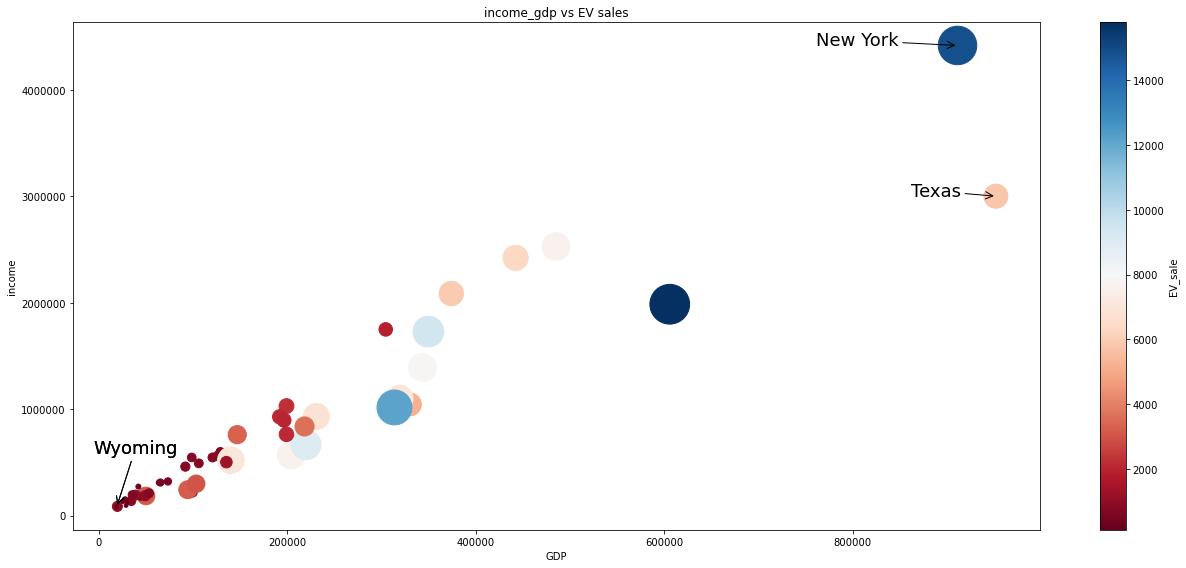

In [10]:
data = data.drop("California")
fig, ax = plt.subplots(figsize=(18,8))
ax.ticklabel_format(style='plain')
draw(data, ax, c='EV_sale', colormap='RdBu', colorbar=True)


plt.annotate(highest_income, xy = (data.loc[highest_income][['GDP', 'income']]), xytext = data.loc[highest_income][['GDP', 'income']] +(-150000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_gdp, xy = (data.loc[highest_gdp][['GDP', 'income']]), xytext = data.loc[highest_gdp][['GDP', 'income']] +(-90000, 0.2), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (data.loc[lowest_income][['GDP', 'income']]), xytext = data.loc[lowest_income][['GDP', 'income']] +(-25000, +500000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_income, xy = (data.loc[lowest_income][['GDP', 'income']]), xytext = data.loc[lowest_income][['GDP', 'income']] +(-25000, +500000), fontsize=18, 
            arrowprops=dict(arrowstyle='->')
            )


plt.title("income_gdp vs EV sales")
ax.set_xlabel('GDP')
ax.set_ylabel('income')
fig.tight_layout()

In [13]:
## df_EV.head(), df_gdp.head(), df_income.head()

In [16]:
data.head()

,income,GDP,EV_sale
State,,,
Alabama,561796.4,126982.8,1007
Alaska,95956.2,29108.0,143
Arizona,569427.7,204327.8,7591
Arkansas,321698.4,73514.4,538
Colorado,667379.3,219975.9,9007


# GDP

C:\Users\21007\AppData\Local\Temp/ipykernel_26260/3110332030.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


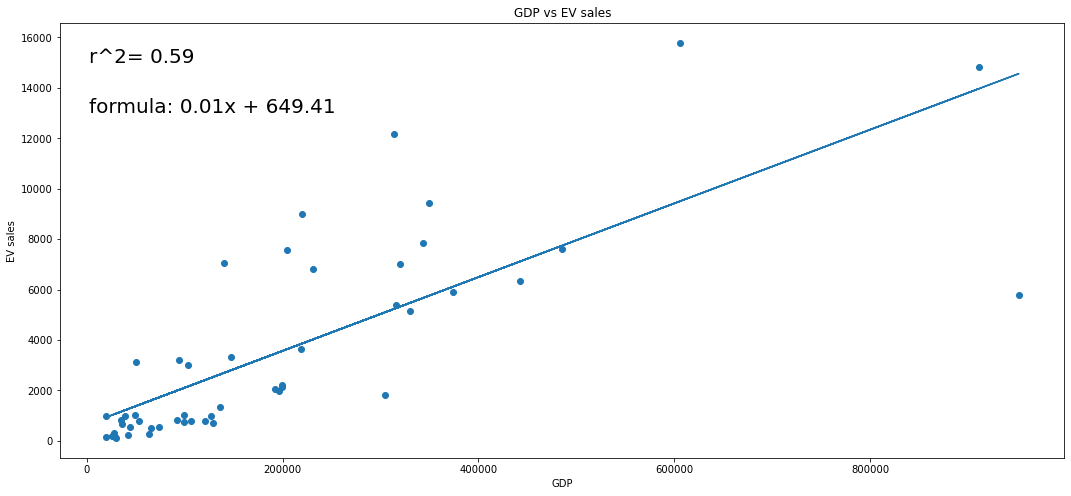

In [28]:
import scipy.integrate 

m, b, r_value, p_value, std_err = scipy.stats.linregress(data['GDP'], data['EV_sale'])

fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(data['GDP'],data['EV_sale'])
ax.plot(data['GDP'], m*data['GDP'] + b)
ax.annotate('r^2= ' + str("{:.2f}".format(r_value**2)), xy=(1950,15000),fontsize=20)
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,13000),fontsize=20)

plt.title("GDP vs EV sales")
ax.set_xlabel('GDP')
ax.set_ylabel('EV sales')

fig.show()

# Income

C:\Users\21007\AppData\Local\Temp/ipykernel_26260/3393086880.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


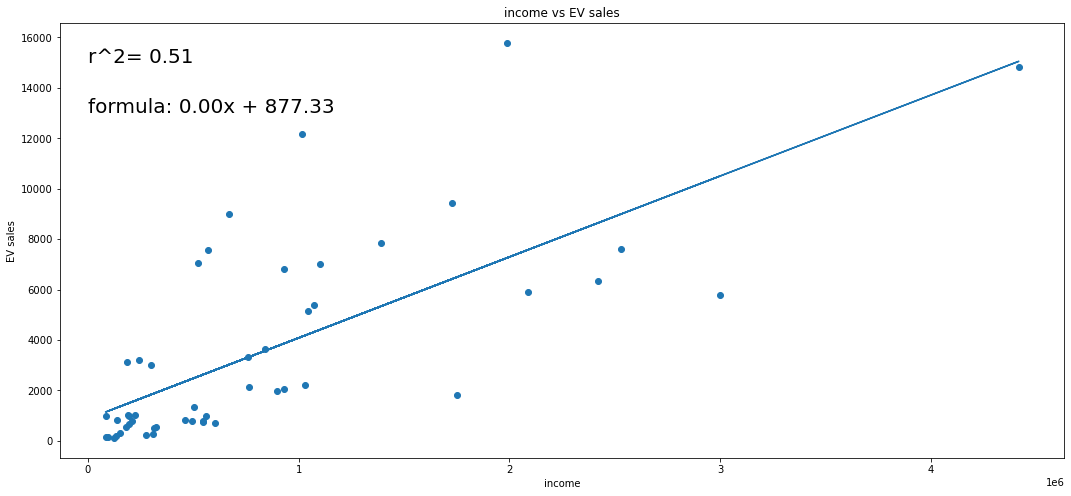

In [29]:
m, b, r_value, p_value, std_err = scipy.stats.linregress(data['income'], data['EV_sale'])

fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(data['income'],data['EV_sale'])
ax.plot(data['income'], m*data['income'] + b)
ax.annotate('r^2= ' + str("{:.2f}".format(r_value**2)), xy=(1950,15000),fontsize=20)
ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,13000),fontsize=20)

plt.title("income vs EV sales")
ax.set_xlabel('income')
ax.set_ylabel('EV sales')

fig.show()